<a href="https://colab.research.google.com/github/AnirudhDesai777/EEG_RNN/blob/main/eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Intalling Pyeeg
!pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-t94acugi
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-t94acugi
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28132 sha256=43a02b86df9e8c956bbee7c5a7a5aaec9ad9cbfa7db73785c44c8191e31a4b24
  Stored in directory: /tmp/pip-ephem-wheel-cache-lne0m2ew/wheels/b0/23/e4/703c908bda656959957029fa145879aa79307b2545a2ef0271
Successfully built pyeeg


In [ ]:
import numpy as np
from sklearn.preprocessing import normalize
import pickle as pickle
import pandas as pd
import pyeeg as pe
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM,BatchNormalization,Activation
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM,BatchNormalization,Activation

ImportError: ignored

In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
def getPSD(sub):
    # channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] #14 Channels chosen to fit Emotiv Epoch+
    channel = [2, 3, 4, 6, 7, 11, 15, 17, 20, 24, 25, 27, 28, 29]
    band = [4,8,12,16,25,45] #5 bands
    window_size = 256 #Averaging band power of 2 sec
    step_size = 16 #Each 0.125 sec update once
    sample_rate = 128 #Sampling rate of 128 Hz
    temp = []
    with open(r'/content/drive/My Drive/data_preprocessed_python/s'+sub+'.dat','rb') as file:
        
        subject = pickle.load(file, encoding='latin1')
        
        for i in range(1,40):   # trials
            raw_data = subject['data'][i]
            raw_labels = subject['labels'][i]
            start = 0
            while start + window_size < len (raw_data[i]):
                temp_array = []
                temp_data = []
                for j in channel:
                    X = raw_data[j][start: start + window_size]
                    Y = pe.bin_power(X, band, sample_rate)
                    temp_data = temp_data + list(Y[0])
                temp_array.append(np.array(temp_data))
                temp_array.append(raw_labels)
                temp.append(np.array(temp_array))
                start = start + step_size
        temp = np.array(temp)
        np.save('out\s' + sub, temp, allow_pickle=True, fix_imports=True)

In [ ]:
subjectList=['01','02','03','04','05']
# for i in range(0,32):
#     if i < 10:
#         subjectList.append('0' + str(i))
#     else:
#         subjectList.append(str(i))
for sub in subjectList:
    getPSD(sub)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
data= []
label = []
for subjects in subjectList:
  

    with open('/content/out\s' + subjects + '.npy', 'rb') as file:
        sub = np.load(file,allow_pickle=True)
        for i in range (0,sub.shape[0]):
          data.append(sub[i][0])
          label.append(sub[i][1])
np.save('data', np.array(data), allow_pickle=True, fix_imports=True)
np.save('label', np.array(label), allow_pickle=True, fix_imports=True)

In [ ]:
df=pd.DataFrame(data=data)
df.to_csv("data.csv",index=False)

df1=pd.DataFrame(data=label)
df1.to_csv("label.csv",index=False)

In [ ]:
data=pd.read_csv("data.csv")
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,1192.392964,1291.832800,1381.865103,1475.910309,1363.050151,1130.469882,1590.203091,1084.023036,1625.203270,2404.378788,1061.119150,1393.873213,896.115949,1122.976710,1037.364226,656.258771,1904.388815,656.740472,1415.849605,1054.148973,1146.600522,1215.811983,849.723946,1569.081387,2257.047915,1254.827139,1488.309146,1194.016877,1332.751344,1646.312479,890.148983,2025.408959,1126.328309,836.309988,787.711535,1210.721769,1607.167643,1095.453455,1178.007491,1169.370107,777.126618,1738.700848,679.031798,1605.595767,1368.952679,662.640111,1101.724258,588.877396,1077.535332,971.611614,1113.585256,1634.656300,884.582666,1595.259345,1135.388245,555.120557,1617.339935,796.142902,1098.443243,927.336677,1493.421928,1987.889120,1180.709055,1271.477094,1545.076141,1284.809586,1850.756800,1121.058327,1035.231374,1177.191201
1,1138.623407,1425.736849,1197.125889,1602.427867,1298.423832,1079.579729,1796.748867,850.021234,1525.983627,2266.247815,998.910175,1453.404650,730.105746,1017.323851,919.850187,645.228847,1800.228017,591.238761,1314.672753,1020.852882,1096.243451,1526.903452,875.196482,1476.340832,2287.153522,1236.739727,1422.901131,1145.320258,1355.240962,1566.321322,822.680116,1977.980785,732.182879,763.430462,721.449412,1151.707736,1566.302448,837.979691,1249.403538,1247.264563,738.561749,1711.758782,581.359633,1539.216906,1314.426337,641.710807,1132.985826,630.638391,1133.344831,896.841713,1124.668287,1593.541525,829.792318,1533.849471,1060.774410,521.131605,1505.606776,722.033002,1021.196431,832.795736,1290.562132,1976.438509,995.926901,1259.550372,1436.532964,1202.235768,1788.538389,944.435522,988.151876,1130.179541
2,1106.175100,1331.414159,1210.214140,1814.696188,1247.438442,1096.400003,1576.065582,1019.326852,1800.861171,2206.700036,1055.653801,1257.597038,831.445721,1122.598021,929.022182,786.980958,1444.439552,811.150287,1378.520720,1066.411272,1091.177899,1483.078632,885.063235,1551.809936,2226.767242,1129.118980,1481.052779,1157.378545,1471.028025,1533.963514,865.957640,1891.259797,750.113423,904.066403,780.329085,1305.230219,1353.829600,789.279873,1347.708206,1255.483344,871.688399,1499.200512,644.869914,1537.343559,1250.145042,716.836749,995.211191,650.981871,1218.253120,902.370476,1117.349428,1419.688261,914.579199,1567.014226,1166.041608,569.531135,1430.852460,708.662986,1017.495506,773.648289,1287.918574,1877.849511,1082.550660,1306.000389,1466.979833,1086.534638,1586.070454,917.381182,1130.880391,1106.765751
3,1102.887845,1361.281167,1168.571156,1870.084156,1299.941771,1045.030642,1601.396406,1177.582939,1741.759993,2218.087229,931.764138,1320.869130,885.103664,1119.091679,957.868179,616.310301,1431.269620,607.623380,1280.587273,992.824063,1211.027900,1581.642325,869.268612,1534.609737,2294.653453,1451.726146,1736.254586,1453.387673,1459.315824,1498.112706,827.266182,1964.247506,822.407405,874.361065,720.490157,1379.889379,1343.959914,796.160950,1347.716628,1139.517245,868.833935,1304.247067,617.960793,1637.815779,1278.739714,768.150033,884.518390,709.681851,1170.075612,866.216208,1019.758135,1346.115882,795.179840,1516.018442,1112.529187,590.339682,1378.066783,736.828789,951.569769,764.212985,1287.916021,1890.251132,1005.982498,1340.215932,1349.773734,1084.075072,1543.237682,849.961940,1079.341565,1123.448290
4,1025.480047,1281.095804,1154.525974,1882.924231,1285.574104,1013.370234,1589.518527,1212.848401,1682.883079,2132.831929,941.585391,1450.873218,946.502853,1210.482247,884.182929,703.153969,1469.327131,720.996102,1295.906801,943.097498,1251.072484,1784.808854,897.921297,1560.190120,2319.578579,1296.458463,1894.352513,1459.802007,1427.654824,1549.767511,953.692815,1945.607592,879.791625,864.339146,727.429821,1265.371358,1400.953865,801.634491,1317.563218,1134.920635,901.386583,1281.923171,610.155415,1633.107287,

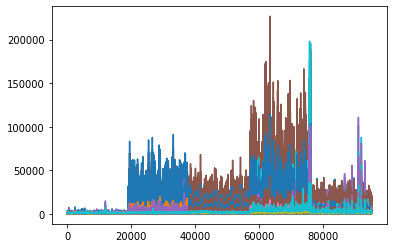

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

In [ ]:
label=pd.read_csv("label.csv")
label


,0,1,2,3
0,8.1,7.31,7.28,8.47
1,8.1,7.31,7.28,8.47
2,8.1,7.31,7.28,8.47
3,8.1,7.31,7.28,8.47
4,8.1,7.31,7.28,8.47
...,...,...,...,...
95155,7.0,6.96,8.00,2.92
95156,7.0,6.96,8.00,2.92
95157,7.0,6.96,8.00,2.92
95158,7.0,6.96,8.00,2.92


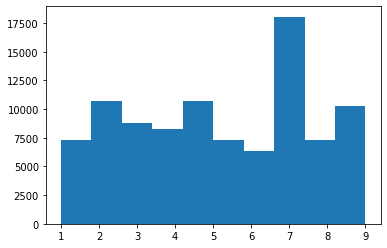

In [ ]:
y_valence=label.loc[:,'0']
plt.hist(y_valence)
plt.show()

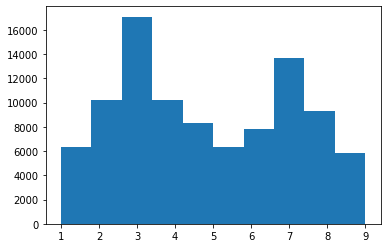

In [ ]:
y_arousal=label.loc[:,'1']
plt.hist(y_arousal)
plt.show()

In [ ]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
x=data
scaler = MinMaxScaler(feature_range=(0, 1))
x = scaler.fit_transform(x)
x

array([[0.01868262, 0.04674496, 0.10241176, ..., 0.10855983, 0.04119163,
        0.01250635],
       [0.01755441, 0.05299384, 0.0865895 , ..., 0.08718907, 0.03748492,
        0.01118327],
       [0.01687357, 0.04859209, 0.08771047, ..., 0.08391559, 0.04872236,
        0.01052432],
       ...,
       [0.10794128, 0.10972687, 0.14101464, ..., 0.13687162, 0.09553557,
        0.03199851],
       [0.10745087, 0.1111483 , 0.14454506, ..., 0.14216634, 0.09165582,
        0.0295645 ],
       [0.10390309, 0.10858815, 0.1411246 , ..., 0.14528671, 0.09161244,
        0.03139534]])

In [ ]:
y_arousal

0        7.31
1        7.31
2        7.31
3        7.31
4        7.31
         ... 
95155    6.96
95156    6.96
95157    6.96
95158    6.96
95159    6.96
Name: 1, Length: 95160, dtype: float64

In [ ]:
y_val = to_categorical(y_valence)
y_val.shape

(95160, 10)

In [ ]:
y_aro = to_categorical(y_arousal)
y_aro

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x = np.reshape(x, (x.shape[0],1,x.shape[1]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y_val, test_size = 0.2, random_state = 4)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(76128, 1, 70)
(76128, 10)
(19032, 1, 70)
(19032, 10)


In [ ]:

model = Sequential()
model.add(LSTM(512, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(LSTM(256,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(LSTM(128,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(LSTM(64,activation="relu",return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(LSTM(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(10))
model.add(Activation('softmax'))



rmsprop =keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08)
model.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 512)         1193984   
_________________________________________________________________
batch_normalization (BatchNo (None, None, 512)         2048      
_________________________________________________________________
dropout (Dropout)            (None, None, 512)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         787456    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 256)         1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         1

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size=150,validation_data= (x_test, y_test))

Epoch 1/100
508/508 [==============================] - 24s 22ms/step - loss: 0.0940 - accuracy: 0.1611 - val_loss: 0.0876 - val_accuracy: 0.1812
Epoch 2/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0854 - accuracy: 0.2352 - val_loss: 0.0816 - val_accuracy: 0.3019
Epoch 3/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0829 - accuracy: 0.2694 - val_loss: 0.0796 - val_accuracy: 0.3183
Epoch 4/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0817 - accuracy: 0.2879 - val_loss: 0.0791 - val_accuracy: 0.3222
Epoch 5/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0806 - accuracy: 0.3060 - val_loss: 0.0782 - val_accuracy: 0.3312
Epoch 6/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0796 - accuracy: 0.3190 - val_loss: 0.0774 - val_accuracy: 0.3431
Epoch 7/100
508/508 [==============================] - 11s 21ms/step - loss: 0.0788 - accuracy: 0.3325 - val_loss: 0.0765 - val_ac

In [ ]:
model1 = Sequential()
model1.add(LSTM(512, batch_input_shape = (None, None, x.shape[2]),return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))


model1.add(LSTM(256,activation="relu",return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))


model1.add(LSTM(128,activation="relu",return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(LSTM(64,activation="relu",return_sequences=True))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))


model1.add(LSTM(32,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


model1.add(Dense(10))
model1.add(Activation('softmax'))

rmsprop =keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08)
model1.compile(loss='mean_squared_error',
                  optimizer=rmsprop,
                  metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 512)         1193984   
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 512)         2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 256)         787456    
_________________________________________________________________
batch_normalization_6 (Batch (None, None, 256)         1024      
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 128)        

In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(x, y_aro, test_size = 0.2, random_state = 4)

In [ ]:
history1 =model1.fit(x_train, y_train1, epochs = 100, batch_size=150,validation_data= (x_test, y_test1))

Epoch 1/100
508/508 [==============================] - 17s 22ms/step - loss: 0.0977 - accuracy: 0.1348 - val_loss: 0.0891 - val_accuracy: 0.1444
Epoch 2/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0916 - accuracy: 0.2023 - val_loss: 0.0841 - val_accuracy: 0.2756
Epoch 3/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0887 - accuracy: 0.2300 - val_loss: 0.0834 - val_accuracy: 0.2834
Epoch 4/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0873 - accuracy: 0.2375 - val_loss: 0.0832 - val_accuracy: 0.2843
Epoch 5/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0862 - accuracy: 0.2492 - val_loss: 0.0826 - val_accuracy: 0.2914
Epoch 6/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0856 - accuracy: 0.2551 - val_loss: 0.0822 - val_accuracy: 0.2945
Epoch 7/100
508/508 [==============================] - 10s 20ms/step - loss: 0.0846 - accuracy: 0.2646 - val_loss: 0.0819 - val_ac

In [ ]:
loss_train = model['train_loss']
loss_val = model['val_loss']
epochs = range(1,100)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

TypeError: ignored

In [ ]:
# Testing
testingList=['06']
for sub in testingList:
    getPSD(sub)

In [ ]:
testingdata= []
testinglabel = []
for subjects in testingList:
  

    with open('/content/out\s' + subjects + '.npy', 'rb') as file:
        testingsub = np.load(file,allow_pickle=True)
        for i in range (0,testingsub.shape[0]):
          testingdata.append(testingsub[i][0])
          testinglabel.append(testingsub[i][1])
np.save('testingdata', np.array(testingdata), allow_pickle=True, fix_imports=True)
np.save('testinglabel', np.array(testinglabel), allow_pickle=True, fix_imports=True)

In [ ]:
df_T=pd.DataFrame(data=testingdata)
df_T.to_csv("testingdata.csv",index=False)

df1_T=pd.DataFrame(data=testinglabel)
df1_T.to_csv("testinglabel.csv",index=False)

In [ ]:
dataT=pd.read_csv("testingdata.csv")
dataT
labelT=pd.read_csv("testinglabel.csv")
labelT

,0,1,2,3
0,6.83,6.62,7.08,5.96
1,6.83,6.62,7.08,5.96
2,6.83,6.62,7.08,5.96
3,6.83,6.62,7.08,5.96
4,6.83,6.62,7.08,5.96
...,...,...,...,...
19027,4.85,4.64,5.04,5.03
19028,4.85,4.64,5.04,5.03
19029,4.85,4.64,5.04,5.03
19030,4.85,4.64,5.04,5.03


In [ ]:
y_valenceT=labelT.loc[:,'0']
y_valenceT
y_arousalT=labelT.loc[:,'1']
y_arousalT

0        6.62
1        6.62
2        6.62
3        6.62
4        6.62
         ... 
19027    4.64
19028    4.64
19029    4.64
19030    4.64
19031    4.64
Name: 1, Length: 19032, dtype: float64

In [ ]:
xT=dataT
scaler = StandardScaler()
scaler.fit(xT)
xT = scaler.transform(xT)
print(xT)
print(xT.shape)

[[ 0.08847128  1.20616467 -1.24902333 ...  0.62095014  1.4805994
  -1.86963798]
 [ 0.08400614  1.15300788 -1.28895029 ... -0.2885883   1.02144828
  -1.82295674]
 [ 0.06916316  1.38498115 -1.2367197  ...  2.09825543  1.42659651
  -1.31130107]
 ...
 [-0.76585177  1.49328679 -1.39394934 ... -1.43513067 -0.11022959
   0.89263428]
 [-0.78125058  1.24862363 -1.17441051 ... -1.10172243  0.0945205
   1.40821624]
 [-0.82275298  1.19349525 -1.38219126 ... -0.13491677 -0.66477127
   1.18817111]]
(19032, 70)


In [ ]:
xT = np.reshape(xT, (xT.shape[0],1,xT.shape[1]))

In [ ]:
predictions = model.predict(xT,batch_size=150 )

Test loss: 38.21017074584961
Test accuracy: 0.6727616786956787
